In [1]:
from components import *
import numpy as np
import scipy.signal as sci

In [2]:
C, H, W = 2, 5 ,5
h_f, w_f = 2, 2
F = 3
M = 1

In [3]:
def approx_eq(a, b):
    return np.all(np.abs(a - b) < 1e-6)

In [4]:
Hp = H - h_f + 1
Wp = W - w_f + 1

conv = Convolution((C, H, W), (h_f, w_f), F, noActivation())
x = np.random.randn(M, C, H, W)

x_fwd = conv.feedforward(x)
assert x_fwd.shape == (M, F, Hp, Wp)

In [5]:
def test_feedforward(m_test, f_test):
    sum = np.zeros((Hp, Wp))
    for c in range(C):
        img = x[m_test, c] 
        filter = conv.filters[f_test, c] # first filter, channel c
        sum += sci.correlate(img, filter, mode="valid")
    sum += conv.biases[f_test]
    
    assert approx_eq(x_fwd[m_test, f_test], sum)

for m in range(M):
    for f in range(F):
        test_feedforward(m, f)

In [6]:
delta = np.random.randn(M, F, Hp, Wp)
conv.set_optimizer(SGD_optimizer(0, 20).get_optimizer())
prev_delta = conv.backprop(delta)
assert prev_delta.shape == (M, C, H, W)

In [7]:
import os
os.getcwd()

'c:\\Users\\stanl\\ml_0\\src'

In [8]:
import mnist_loader

training_data, validation_data, test_data = mnist_loader.load_data_wrapper("../data/mnist.pkl.gz")
n_train = len(training_data)

In [10]:
import modular_network

reg = L2Regularization(3.125 / n_train)
net = modular_network.Network([
    Flatten((28, 28)),
    FullyConnected(28*28, 100, tanh(), reg),
    FullyConnected(100, 100, tanh(), reg),
    FullyConnected(100, 10, Softmax(), reg)
], cost = BinaryCrossEntropyCost())

In [11]:
optim = SGD_momentum_optimizer(0.005, 20, 0.95)
net.set_optimizer(optim)

In [12]:
net.SGD(training_data, 10, 20, test_data, 
        monitor_training_acc=False, 
        monitor_test_acc=True,
        )

Epoch 1 training complete, took 8.810375213623047 seconds
Accuracy on test data: 8499 / 10000
Epoch 2 training complete, took 10.75200080871582 seconds
Accuracy on test data: 8888 / 10000
Epoch 3 training complete, took 11.614086151123047 seconds
Accuracy on test data: 9004 / 10000
Epoch 4 training complete, took 10.764673948287964 seconds
Accuracy on test data: 9083 / 10000
Epoch 5 training complete, took 10.091623544692993 seconds
Accuracy on test data: 9139 / 10000
Epoch 6 training complete, took 10.063230276107788 seconds
Accuracy on test data: 9195 / 10000
Epoch 7 training complete, took 10.265061140060425 seconds
Accuracy on test data: 9228 / 10000
Epoch 8 training complete, took 10.179511308670044 seconds
Accuracy on test data: 9264 / 10000
Epoch 9 training complete, took 10.100712776184082 seconds
Accuracy on test data: 9288 / 10000
Epoch 10 training complete, took 10.1143798828125 seconds
Accuracy on test data: 9325 / 10000


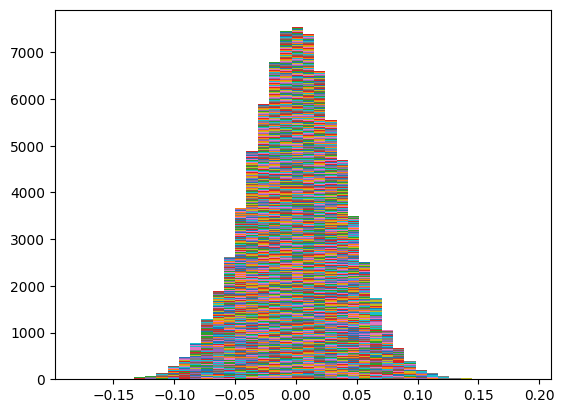

In [32]:
import matplotlib.pyplot as plt
plt.hist(net.layers[1].weights, bins=40, histtype="barstacked")
plt.show()

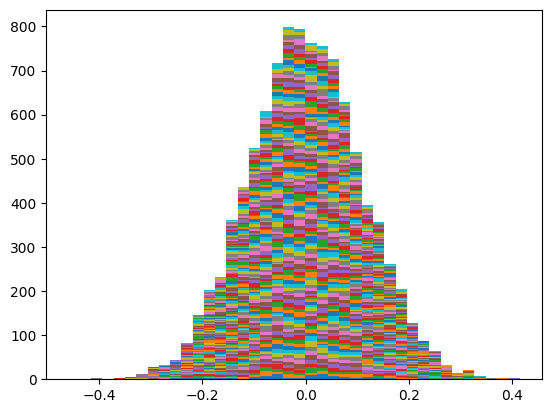

In [31]:
plt.hist(net.layers[2].weights, bins=40, histtype="barstacked")
plt.show()

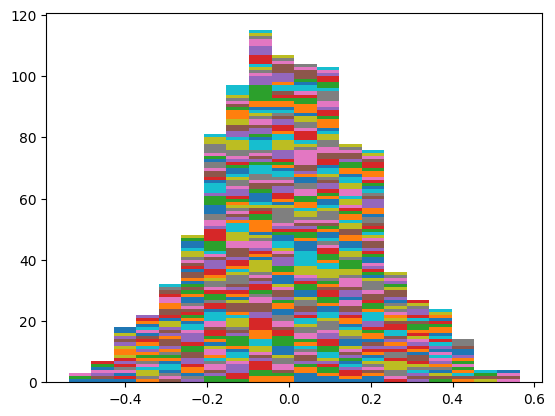

In [35]:
plt.hist(net.layers[3].weights, bins=20, histtype="barstacked")
plt.show()

In [36]:
conv_net = modular_network.Network([
    Convolution((28, 28), (5, 5), 4, clippedReLU(), correct2Dinput = True), # --> (4, 24, 24)
    MaxPool((4, 24, 24)),
    Flatten((4, 12, 12)),
    FullyConnected(4*12*12, 50, tanh(), reg),
    FullyConnected(50, 50, tanh(), reg),
    FullyConnected(50, 10, Softmax(), reg)
], cost = BinaryCrossEntropyCost())

In [38]:
conv_net.set_optimizer(optim)

In [40]:
conv_net.SGD(training_data, 10, 20, test_data, 
        monitor_training_acc=False, 
        monitor_test_acc=True,
        )

Epoch 1 training complete, took 127.47853779792786 seconds
Accuracy on test data: 8244 / 10000
Epoch 2 training complete, took 117.76653528213501 seconds
Accuracy on test data: 8885 / 10000
Epoch 3 training complete, took 114.35406827926636 seconds
Accuracy on test data: 9205 / 10000
Epoch 4 training complete, took 113.9613664150238 seconds
Accuracy on test data: 9298 / 10000
Epoch 5 training complete, took 116.41659283638 seconds
Accuracy on test data: 9408 / 10000
Epoch 6 training complete, took 118.58836197853088 seconds
Accuracy on test data: 9451 / 10000
Epoch 7 training complete, took 116.20689702033997 seconds
Accuracy on test data: 9474 / 10000
Epoch 8 training complete, took 117.52172923088074 seconds
Accuracy on test data: 9509 / 10000
Epoch 9 training complete, took 112.60206413269043 seconds
Accuracy on test data: 9541 / 10000
Epoch 10 training complete, took 115.30504941940308 seconds
Accuracy on test data: 9568 / 10000


In [41]:
conv_net.SGD(training_data, 10, 20, test_data, 
        monitor_training_acc=False, 
        monitor_test_acc=True,
        )

Epoch 1 training complete, took 107.77238893508911 seconds
Accuracy on test data: 9612 / 10000
Epoch 2 training complete, took 109.33832836151123 seconds
Accuracy on test data: 9624 / 10000
Epoch 3 training complete, took 108.12757968902588 seconds
Accuracy on test data: 9631 / 10000
Epoch 4 training complete, took 108.9686119556427 seconds
Accuracy on test data: 9657 / 10000
Epoch 5 training complete, took 112.16818690299988 seconds
Accuracy on test data: 9611 / 10000


KeyboardInterrupt: 

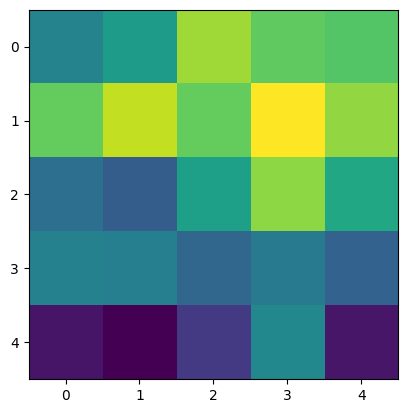

In [56]:
plt.imshow(conv_net.layers[0].filters[0, 0])

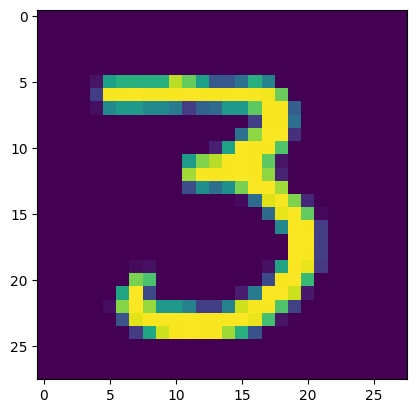

In [70]:
plt.imshow(training_data[4][0])

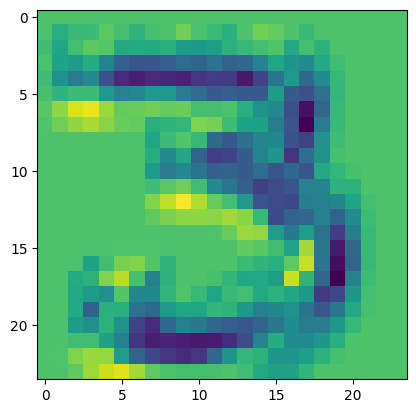

In [98]:
f = 3
conved_img = sci.correlate(training_data[4][0], conv_net.layers[0].filters[f, 0], mode="valid") + conv_net.layers[0].biases[f]
plt.imshow(conved_img)

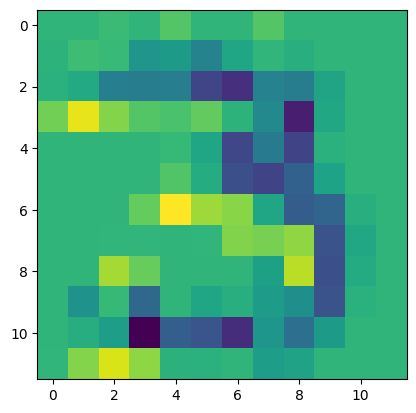

In [96]:
m = MaxPool((1, 24, 24))
pooled_img = m.feedforward(np.array([conved_img]))
plt.imshow(pooled_img[0, 0])

In [94]:
conv_net.layers[0].biases

array([ 0.12599984, -0.00603516, -1.35431575, -2.2749751 ])

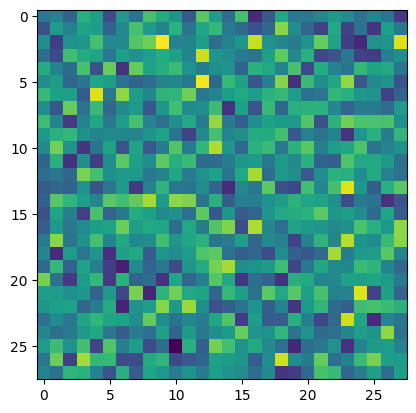

In [134]:
randn_images = np.random.randn(40, 28, 28)
plt.imshow(randn_images[0])

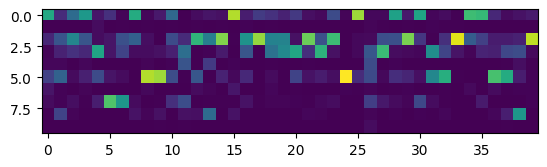

In [ ]:
plt.imshow(conv_net.feedforward(randn_images))

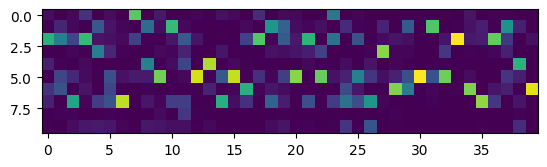

In [136]:
plt.imshow(net.feedforward(randn_images))

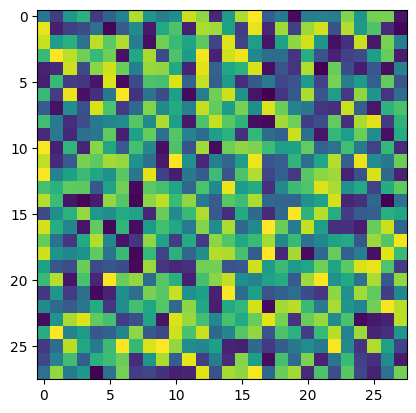

In [139]:
uniform_images = np.random.uniform(0, 1, size=(40, 28, 28))
plt.imshow(uniform_images[0])

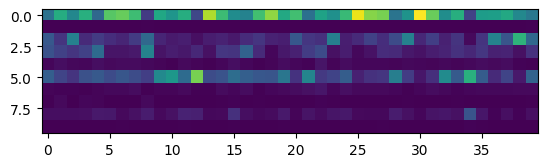

In [140]:
plt.imshow(conv_net.feedforward(uniform_images))

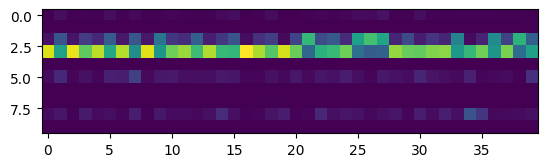

In [141]:
plt.imshow(net.feedforward(uniform_images))

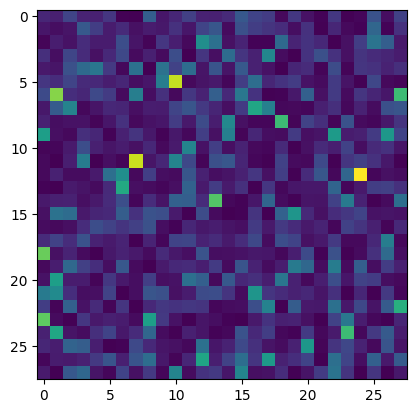

In [142]:
expo_images = np.random.exponential(1, size=(40, 28, 28))
plt.imshow(expo_images[0])

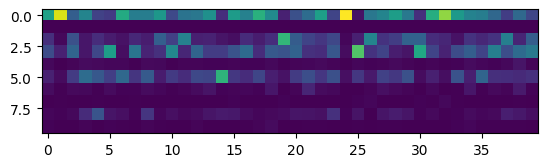

In [143]:
plt.imshow(conv_net.feedforward(expo_images))

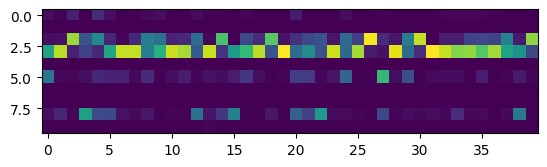

In [144]:
plt.imshow(net.feedforward(expo_images))

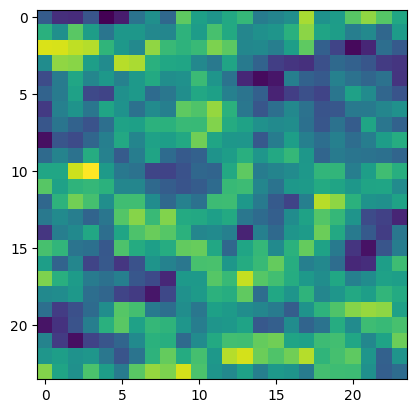

In [145]:
plt.imshow(sci.correlate(uniform_images[0], conv_net.layers[0].filters[0, 0], mode="valid") + conv_net.layers[0].biases[0])

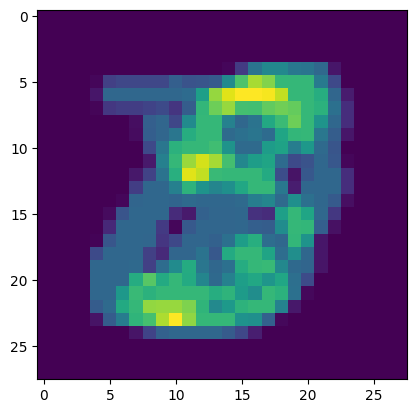

In [198]:
linear_combo = 0.33 * training_data[3][0] + 0.33 * training_data[4][0] + 0.33 * training_data[5][0]
plt.imshow(linear_combo)

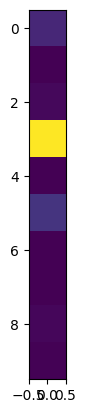

In [199]:
plt.imshow(conv_net.feedforward(np.array([linear_combo])))

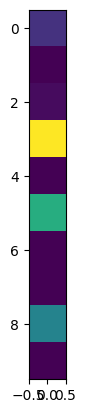

In [200]:
plt.imshow(net.feedforward(np.array([linear_combo])))